# Task 4 - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

# Twitter Sentiment Analysis

### Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
column_names = ['Id','Commented_On','Sentiment','Comment']

### Loading the Data

In [3]:
train_df=pd.read_csv(r"D:\New folder\twitter_training.csv",header=None,names=column_names)
test_df=pd.read_csv(r"D:\New folder\twitter_validation.csv",header=None,names=column_names)

In [4]:
train_df.head()

,Id,Commented_On,Sentiment,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
test_df.head()

,Id,Commented_On,Sentiment,Comment
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
train_df['Sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [7]:
test_df['Sentiment'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Sentiment, dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            74682 non-null  int64 
 1   Commented_On  74682 non-null  object
 2   Sentiment     74682 non-null  object
 3   Comment       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1000 non-null   int64 
 1   Commented_On  1000 non-null   object
 2   Sentiment     1000 non-null   object
 3   Comment       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [10]:
df = pd.concat([train_df, test_df], ignore_index=True)
df.head()

,Id,Commented_On,Sentiment,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
print(train_df.shape)
print(test_df.shape)

(74682, 4)
(1000, 4)


In [12]:
df.shape

(75682, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            75682 non-null  int64 
 1   Commented_On  75682 non-null  object
 2   Sentiment     75682 non-null  object
 3   Comment       74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


## Analysis of the Data

## Sentiment Distribution

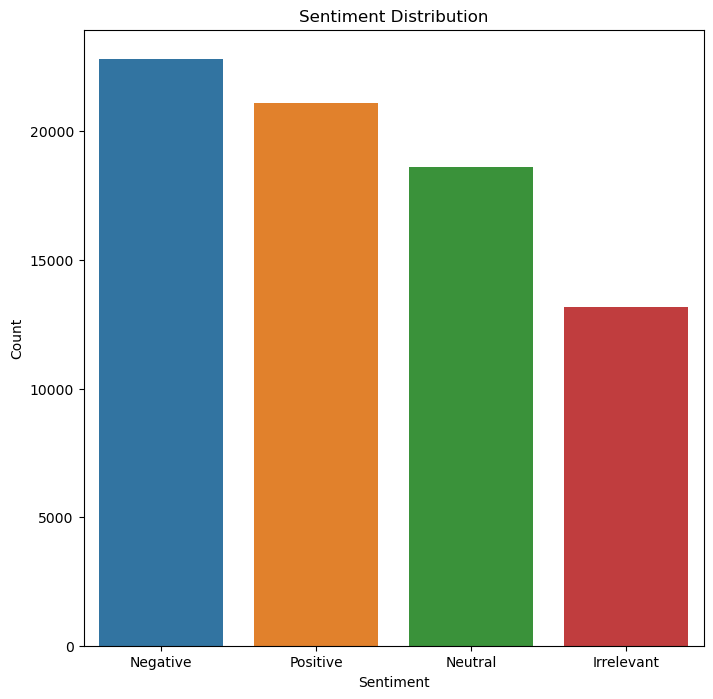

In [15]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

* The above bar graph shows the distribution of the sentiment of the comments. It shows that maximum comments are negative whereas the least sentiment is of irrelevant comments.

## Commented_on Distribution

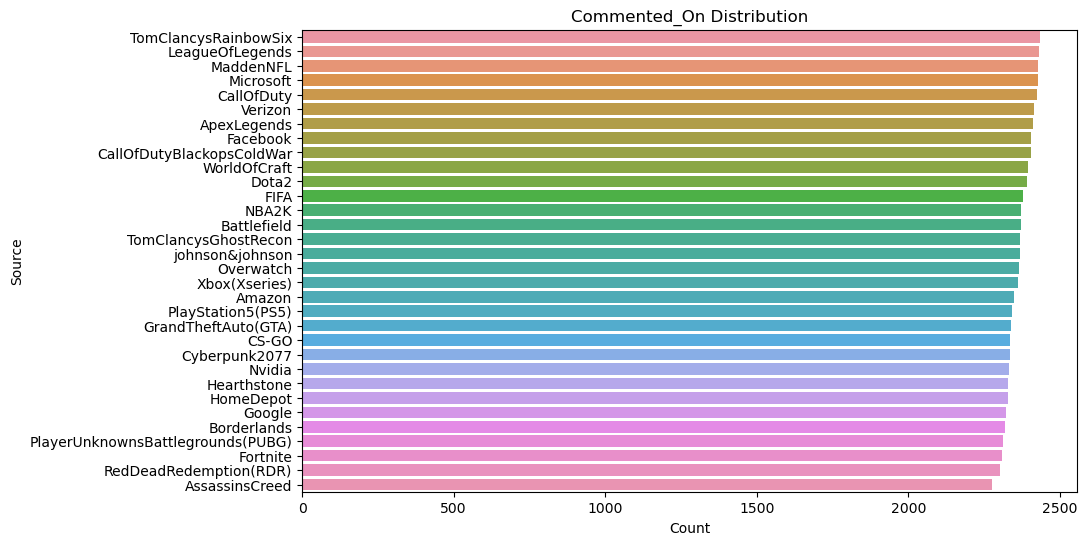

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Commented_On', order=df['Commented_On'].value_counts().index)
plt.title('Commented_On Distribution')
plt.xlabel('Count')
plt.ylabel('commented_on')
plt.show()


* The countplot shows Commented_on dispersion where it shows how many comments are made about each of the Commented_ons. It indicates that how much popular a Commented_on is in the data.

## Comment Length Distribution

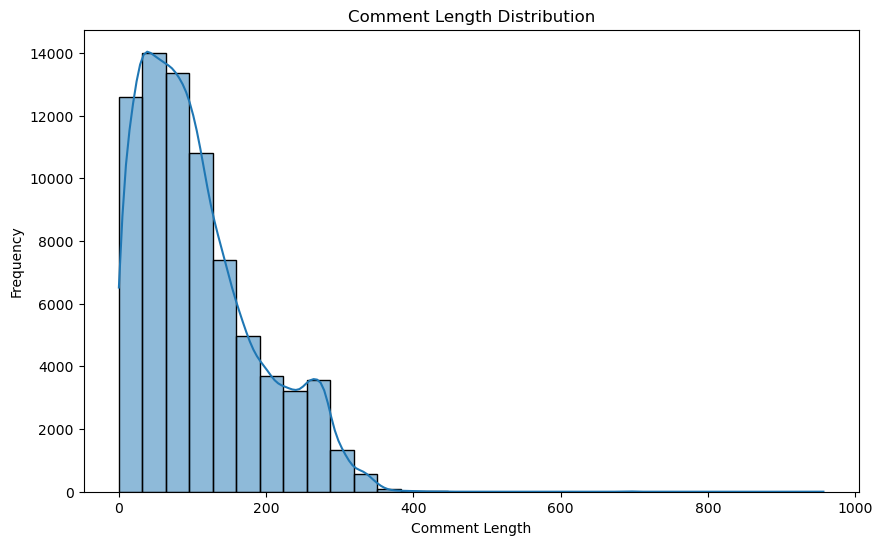

In [17]:
df['Comment_Length'] = df['Comment'].apply(lambda x: len(x) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(df['Comment_Length'], bins=30, kde=True)
plt.title('Comment Length Distribution')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


* This graph analyzes the comment length which suggests that users prefer to write consise comments. This can help to tailor sentiment analysis models which can handle small data effectively.

## Comment Length vs. Sentiment

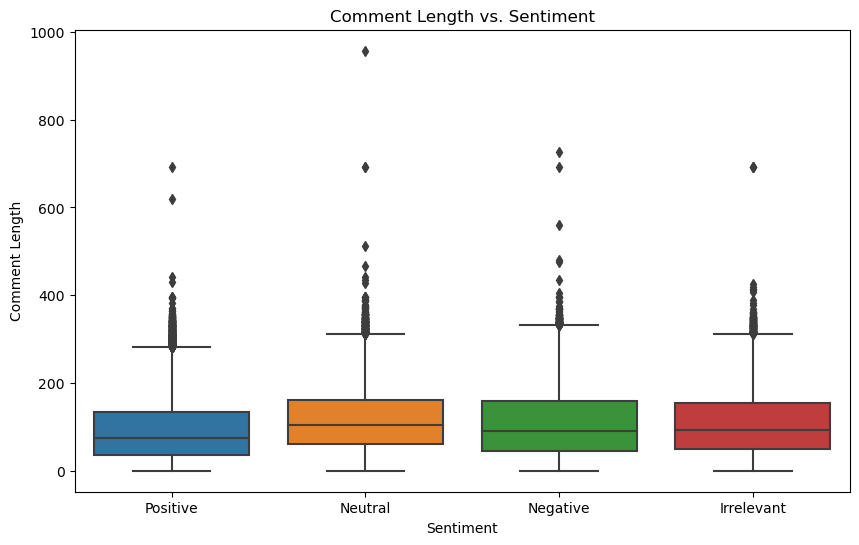

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Comment_Length')
plt.title('Comment Length vs. Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.show()


* Every sentiment shows that 75% of the distribution for determining the sentiment is approximately 300 words. Above 600 words the comments become verbose as the sentiment can be determined without using too many words.

In [21]:
df.columns

Index(['Id', 'Commented_On', 'Sentiment', 'Comment', 'Comment_Length'], dtype='object')

## Sentiment by Commented_on

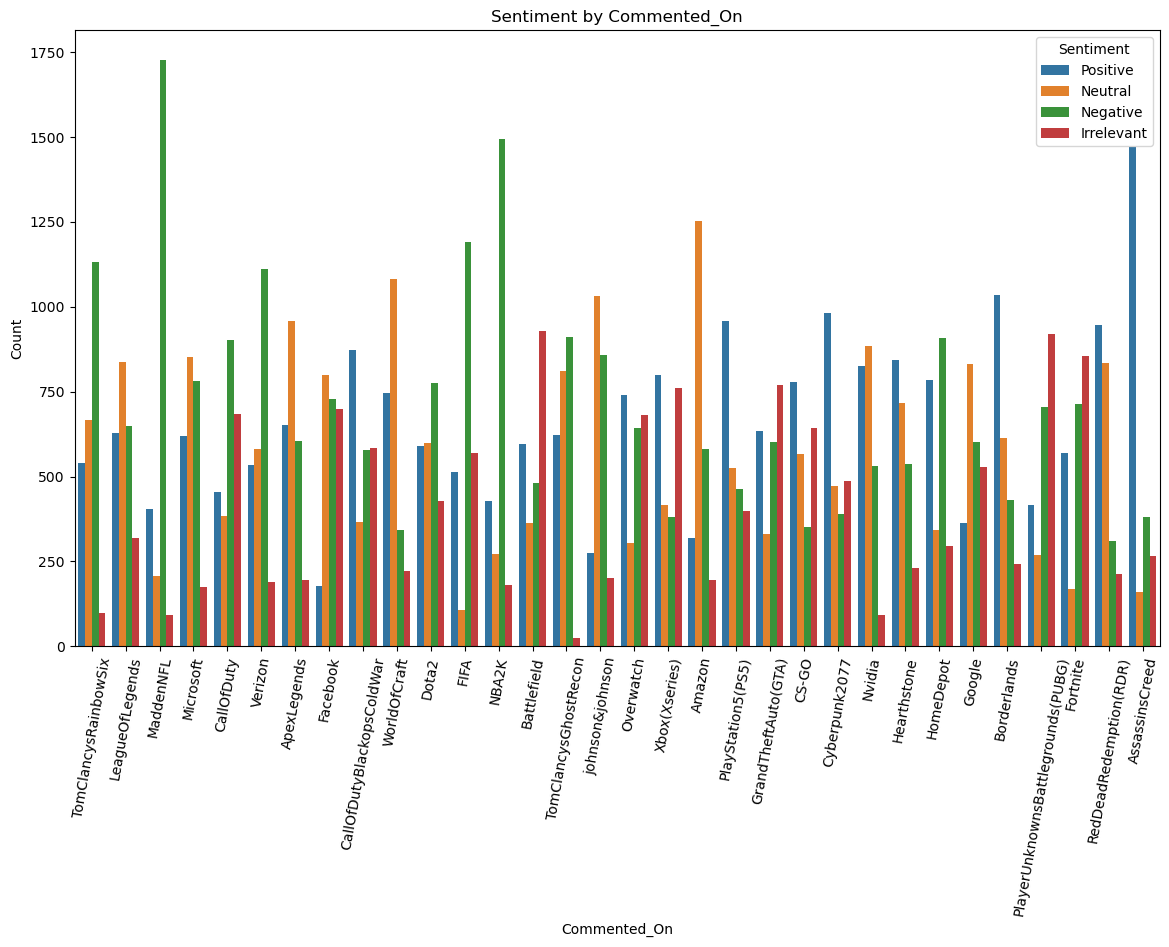

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Commented_On', hue='Sentiment', order=df['Commented_On'].value_counts().index)
plt.title('Sentiment by Commented_On')
plt.xlabel('Commented_On')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()


* AssassinsCreed gained the highest positive comments whereas MaddenNFL shows the get the most negative comments, followed by NBA2K. Amazon and WorldofCraft are neutral while Battle field shows the most irrelevant comments.

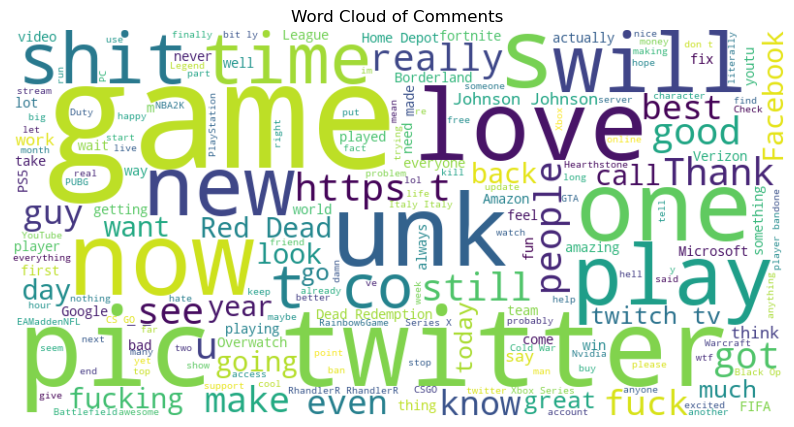

In [24]:
from wordcloud import WordCloud

# Generate a word cloud for the comments
comment_text = ' '.join(train_df['Comment'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Comments')
plt.axis('off')
plt.show()


* Used WordCloud to look at the words which are frequently used.